# **Introduction**

Text Generation is one of the most prominent tasks in the field of Natural Language Processing (NLP).
It focuses on the ability to generate new sentences or text based on given input data.

Due to its creative and context-aware outputs, text generation has been widely applied across various domains and problem types.
One of the most notable examples is ChatGPT, a chatbot application that has gained global attention for its remarkable capability to generate coherent and human-like responses.

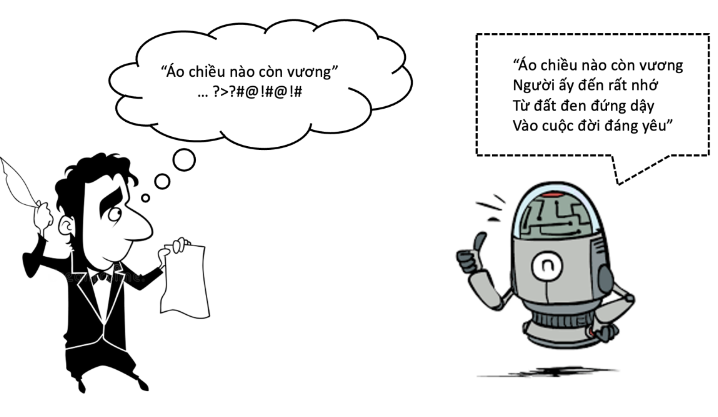

Input/Output of the program:

* **Input:** A string of starting characters for the poem.
* **Output:** The completed poem.


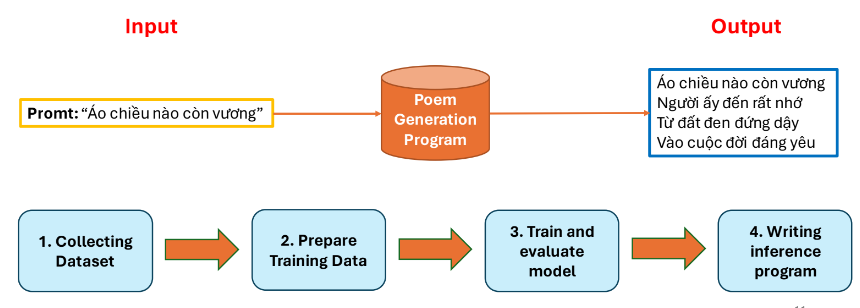

# Data Crawling

##Install Selenium

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.Wog0rHeoF4/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.8M17Ufwftj/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.CgORAtpknb/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

## Import libraries

In [ ]:
import pandas as pd
import os
import requests
import time
import random

from tqdm import tqdm
from selenium import webdriver # interact with web browsers through automation.
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By # provides methods for locating elements on web pages (e.g., By.ID, By.NAME, By.XPATH).
from selenium.webdriver.support.ui import WebDriverWait # used to wait for certain conditions to occur before proceeding with test steps.
from selenium.webdriver.support import expected_conditions as EC

## Crawl poem

In [ ]:
WEBDRIVER_DELAY_TIME_INT = 20 # default waiting time

service = Service(executable_path=r'/usr/bin/chromedriver') # specify the path to the ChromeDriver executable (the browser automation tool for Chrome).
chrome_options = webdriver.ChromeOptions() # configure various options for the Chrome browser instance that will be launched
chrome_options.add_argument('--headless') # instructs Chrome to run in headless mode (without a visible browser window).
chrome_options.add_argument('--no-sandbox') # disables the Chrome sandbox for potential compatibility reasons
chrome_options.headless = True # same effect as add_argument('--headless').
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.implicitly_wait(5) # Selenium will wait for up to 5 seconds for elements to become available before throwing an exception
wait = WebDriverWait(driver, WEBDRIVER_DELAY_TIME_INT) # explicitly wait for specific conditions to occur before proceeding with test steps.

In [ ]:
deletion_script = 'arguments[0].parentNode.removeChild(arguments[0]);'
root_dir = '/content/drive/MyDrive/AIO2023/1. Main Subject/Module8_DeeplearningApplications/Week 4_ Project (Poem Generation, Text Project: Low-Resource Machine Translation)/(4) Wednesday_ Text Project: Poem Generation/dataset'
alphabet = ["a", "ă", "â", "b", "c", "d", "đ", "e", "ê", "g", "h", "i", "k", "l", "m", "n", "o", "ô", "ơ", "p", "q", "r", "s", "t", "u", "ư", "v", "x", "y"]

for char in alphabet[0:8]:
    print('='*15 + char*10 + '='*15)
    for page_idx in tqdm(range(1, 11)):
        datasets = []
        main_url = f'https://www.thivien.net/searchpoem.php?Title={char}&PoemType=18&ViewType=1&Country=2&Age[]=3&Page={page_idx}'
        # main_url = f'https://www.thivien.net/searchpoem.php?PoemType=18&Page={page_idx}'
        driver.get(main_url)

        content_tags_xpath = '//*[@class="page-content container"]/div[2]/div/div[@class="list-item"]'
        content_tags = driver.find_elements(By.XPATH, content_tags_xpath)

        for idx in range(len(content_tags)):
            try:
                content_tag_xpath = f'/html/body/div[4]/div[2]/div/div[{2+idx}]' # /html/body/div[5]/div[2]/div/div[3], /html/body/div[5]/div[2]/div/div[4]
                content_title_xpath = f'/html/body/div[4]/div[2]/div/div[{2+idx}]/h4/a' # /html/body/div[5]/div[2]/div/div[3]/h4/a

                content_tag = wait.until(EC.presence_of_element_located((By.XPATH, content_tag_xpath))) # wait.until sẽ chờ cho đến khi phần tử HTML được xác định bởi XPATH xuất hiện trên trang web trước khi trả về đối tượng element đó.
                poem_title = wait.until(EC.presence_of_element_located((By.XPATH, content_title_xpath))).text # Lấy nội dung (tên) của thẻ tiêu đề bài thơ.
                poem_url = wait.until(EC.presence_of_element_located((By.XPATH, content_title_xpath))).get_attribute('href') # Lấy URL của bài thơ từ thuộc tính href của thẻ tiêu đề.

                try:
                    driver.get(poem_url) # # Navigate to the poem's page

                    poem_src_xpath = '//div[@class="small"]' # # XPath to identify the source element
                    poem_content_tag = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'poem-content'))) # # Wait for poem content element

                    try:
                        poem_content_i_tag = poem_content_tag.find_element(By.TAG_NAME, 'i')
                        driver.execute_script(deletion_script, poem_content_i_tag) # attempting to remove italic formatting
                    except:
                        pass

                    try:
                        poem_content_b_tag = poem_content_tag.find_element(By.TAG_NAME, 'b')
                        driver.execute_script(deletion_script, poem_content_b_tag) # attempting to remove botalic formatting
                    except:
                        pass

                    # content
                    poem_content = poem_content_tag.text

                    # source
                    try:
                        poem_src_tag = wait.until(EC.presence_of_element_located((By.XPATH, poem_src_xpath)))
                        poem_src = poem_src_tag.text
                    except:
                        poem_src = ''

                    poem_info = {
                        'title': poem_title,
                        'content': poem_content,
                        'source': poem_src,
                        'url': poem_url
                    }

                    datasets.append(poem_info)

                    driver.back()
                except Exception as e:
                    print(e)
                    print(poem_url)
            except:
                pass
        df = pd.DataFrame(datasets)
        df.to_csv(os.path.join(root_dir, f'poem_dataset{page_idx}{char}.csv'), index=True)
    print()

===============aaaaaaaaaa===============


100%|██████████| 10/10 [31:55<00:00, 191.58s/it]



===============ăăăăăăăăăă===============


100%|██████████| 10/10 [32:46<00:00, 196.65s/it]



===============ââââââââââ===============


100%|██████████| 10/10 [32:12<00:00, 193.24s/it]



===============bbbbbbbbbb===============


100%|██████████| 10/10 [30:32<00:00, 183.25s/it]



===============cccccccccc===============


100%|██████████| 10/10 [34:22<00:00, 206.21s/it]



===============dddddddddd===============


100%|██████████| 10/10 [31:20<00:00, 188.04s/it]



===============đđđđđđđđđđ===============


100%|██████████| 10/10 [32:13<00:00, 193.38s/it]



===============eeeeeeeeee===============


100%|██████████| 10/10 [33:48<00:00, 202.84s/it]

In [ ]:
import os

root_dir = '/content/drive/MyDrive/AIO2023/1. Main Subject/Module8_DeeplearningApplications/Week 4_ Project (Poem Generation, Text Project: Low-Resource Machine Translation)/(4) Wednesday_ Text Project: Poem Generation/dataset'
df_list = []

for poem_file in os.listdir(root_dir):
    if poem_file.startswith('poem'):
        df = pd.read_csv(os.path.join(root_dir, poem_file))
        if len(df) >= 1:
            df_list.append(df)

df_combined = pd.concat(df_list)
final_df = df_combined.drop(columns=["Unnamed: 0"]).reset_index(drop=True)
final_df.to_csv(os.path.join(root_dir, f'poem_dataset.csv'), index=True)

# Practice

## **1. Import libraries**

In [ ]:
import math
import os
import re
import time
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

## **2. load dataset**

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/AIO2023/1. Main Subject/Module8_DeeplearningApplications/Week 4_ Project (Poem Generation, Text Project: Low-Resource Machine Translation)/(4) Wednesday_ Text Project: Poem Generation/dataset/poem_dataset.csv'
df = pd.read_csv(DATASET_PATH)
df

,Unnamed: 0,title,content,source,url
0,0,“Bên đường xe tang”,Bên đường xe tang buồn đi qua\nChiều hôm mồ ho...,[Thông tin 1 nguồn tham khảo đã được ẩn],https://www.thivien.net/Th%C3%ADch-Thi%E1%BB%8...
1,1,“Biển trần tham dục”,Biển trần tham dục biết sao cùng!\nKhoá lợi và...,[Thông tin 1 nguồn tham khảo đã được ẩn],https://www.thivien.net/Th%C3%ADch-Thi%E1%BB%8...
2,2,“Có phải em vừa mới hiện ra...”,Có phải em vừa mới hiện ra\nTừ trong xa thẳm c...,[Thông tin 1 nguồn tham khảo đã được ẩn],https://www.thivien.net/Nguy%E1%BB%85n-Nh%E1%B...
3,3,“Em mỏng manh...”,Em mỏng manh như mùa thu nán lại\nMột tiếng th...,[Thông tin 1 nguồn tham khảo đã được ẩn],https://www.thivien.net/Tr%E1%BA%A7n-%C4%90%C3...
4,4,“Hoa đào năm ngoái”,"Hoa đào nở sớm, nên tàn sớm.\nBước đến vườn xư...",(Sau tết Đinh Dậu),https://www.thivien.net/Ph%E1%BA%A1m-Ng%E1%BB%...
...,...,...,...,...,...
2333,2333,Chỉ là lời yêu em đó thôi,Anh dặn mùa đông có gặp em\nĐừng làm khô tóc t...,NaN,https://www.thivien.net/Minh-S%C6%A1n-L%C3%AA/...
2334,2334,Chỉ là thơ,"Thơ chỉ là thơ, có thế thôi\nĐôi dòng, qua nhữ...",06/3/2011,https://www.thivien.net/T%E1%BB%AB-Nguy%E1%BB%...
2335,2335,Chỉ một lời thôi em,Trót lỡ sinh ra thời lửa khói\nLỡ nhìn dấu đạn...,2014,https://www.thivien.net/Minh-S%C6%A1n-L%C3%AA/...
2336,2336,Chị ngồi khâu lưới,"Nắng ấm, lưới chài giăng\nNhư dơi bay tới tấp\...","Hòn Gai, 11-1958\n\n[Thông tin 1 nguồn tham kh...",https://www.thivien.net/Huy-C%E1%BA%ADn/Ch%E1%...


In [ ]:
len(df)

2338

In [ ]:
df['content'][0].split('\n')

['Bên đường xe tang buồn đi qua',
 'Chiều hôm mồ hoang sương trăng tà',
 'Vô thường đời trần thương ôi mau!',
 'Người đi rồi lần sang phiên ta.',
 'Nghìn xưa xa vời trong mông lung',
 'Tài hoa tan về nơi vô cùng!',
 'Luân hồi không cầu đường siêu thăng',
 'Dù cho hiền minh sao anh hùng?',
 'Hoàng hôn mây hồng in non xa',
 'Dung hoa thầm khô theo suy già',
 'Di Đà chuyên tu phòng lâm chung',
 'Tương tư mơ về trời Liên Hoa.']

## **3. Build vectorization function**

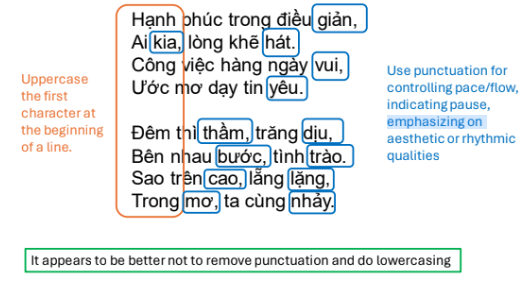

In [ ]:
def text_normalize(text):
    text = text.strip()

    return text

df['content'] = df['content'].apply(lambda x: text_normalize(x))

In [ ]:
def tokenizer(text):
    return text.split()

def yield_tokens(df):
    for idx, row in df.iterrows():
        yield tokenizer(row['content'])

vocab = build_vocab_from_iterator(
    yield_tokens(df),
    specials=['<unk>', '<pad>', '<sos>', '<eos>', '<eol>']
)
vocab.set_default_index(vocab['<unk>'])
vocab.get_stoi()

{'“Đời': 9740,
 '“ăn': 9739,
 '“ú': 9737,
 '“trồng': 9734,
 '“phấn': 9730,
 '“Vội': 9721,
 '“Vui': 9719,
 '“Thản': 9717,
 '“khoán”': 9727,
 '“Thoăn': 9716,
 '“PHỤC': 9712,
 '“Ngồi': 9711,
 '“Kìa': 9706,
 '“Chậm': 9701,
 'ủng': 9695,
 'Ờ': 9693,
 'ớn': 9692,
 'ịt': 9688,
 'ả.': 9682,
 'ơi”.': 9676,
 'ơi?”': 9675,
 'ơi.': 9673,
 'đứng...': 9669,
 'đỡ,': 9666,
 'đờ...': 9663,
 'đổng': 9658,
 'đồi,': 9656,
 'đềm...': 9649,
 'đề,': 9648,
 'đến?': 9646,
 'đẵng': 9645,
 'đắp,': 9643,
 'đắm,': 9642,
 'đầy!': 9639,
 'đầu;': 9638,
 'đầu:': 9637,
 'đưa...': 9629,
 'đưa!...': 9628,
 'đũi': 9627,
 'đúc': 9625,
 'đùa!': 9623,
 'đô?': 9619,
 'đó...': 9616,
 'đê?': 9613,
 'đèo?': 9610,
 'đây...': 9608,
 'đâu..': 9605,
 'đào…': 9604,
 'đàng...': 9600,
 'đàn.': 9599,
 'đài,': 9597,
 'đoạn.': 9595,
 'đoái;': 9594,
 'điệu,': 9593,
 'điều?': 9592,
 'điều!': 9590,
 'điền': 9589,
 'đi...': 9587,
 'đa?': 9585,
 'Đủ': 9583,
 'Đục': 9582,
 'Đảo,': 9572,
 'Đúc': 9569,
 'Đù': 9568,
 'Đám': 9561,
 'Đàm': 9560,
 'Đ

In [ ]:
vocab.get_itos()[0]

'<unk>'

In [ ]:
PAD_TOKEN = vocab['<pad>']
EOS_TOKEN = vocab['<eos>']

MAX_SEQ_LEN = 33 # 7x4 + 4 eol + sos + eos

def pad_and_truncate(input_ids, max_seq_len):
    if len(input_ids) > max_seq_len:
        input_ids = input_ids[:max_seq_len]
    else:
        input_ids += [PAD_TOKEN] * (max_seq_len - len(input_ids))

    return input_ids

def vectorize(text, max_seq_len):
    input_ids = [vocab[token] for token in tokenizer(text)]
    input_ids = pad_and_truncate(input_ids, max_seq_len)

    return input_ids

def decode(input_ids):
    return [vocab.get_itos()[token_id] for token_id in input_ids]

In [ ]:
print(df['content'][0].split('\n')[0])
print(vectorize(df['content'][0].split('\n')[0], 10))

Bên đường xe tang buồn đi qua
[280, 38, 384, 1025, 45, 20, 64, 1, 1, 1]


## **4. Create Poem Dataset**

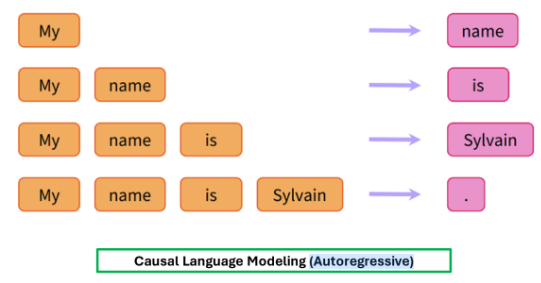

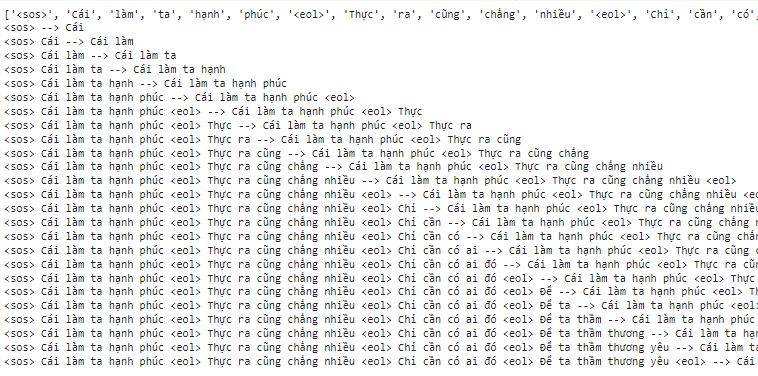

In [ ]:
class PoemDataset(Dataset):
    def __init__(self, df, tokenizer, vectorizer, max_seq_len):
        self.tokenizer = tokenizer
        self.vectorizer = vectorizer
        self.max_seq_len = max_seq_len
        self.input_seqs, self.target_seqs, self.padding_masks = self.create_samples(df)

    def create_padding_mask(self, input_ids, pad_token_id=PAD_TOKEN):
        return [0 if token_id == pad_token_id else 1 for token_id in input_ids]

    def split_content(self, content):
        samples = []

        poem_parts = content.split('\n\n') # đoạn thơ
        for poem_part in poem_parts:
            poem_in_lines = poem_part.split('\n')
            if len(poem_in_lines) == 4:
                samples.append(poem_in_lines)

        return samples

    def prepare_sample(self, sample): # list các câu thơ
        input_seqs = []
        target_seqs = []
        padding_masks = []

        input_text = '<sos> ' + ' <eol> '.join(sample) + ' <eol> <eos>'
        input_ids = self.tokenizer(input_text)
        for idx in range(1, len(input_ids)):
            input_seq = ' '.join(input_ids[:idx]) # shifted right
            target_seq = ' '.join(input_ids[1:idx+1])

            input_seq = self.vectorizer(input_seq, self.max_seq_len)
            target_seq = self.vectorizer(target_seq, self.max_seq_len)

            padding_mask = self.create_padding_mask(input_seq)

            input_seqs.append(input_seq)
            target_seqs.append(target_seq)
            padding_masks.append(padding_mask)

        return input_seqs, target_seqs, padding_masks

    def create_samples(self, df):
        input_seqs = []
        target_words = []
        padding_masks = []

        for idx, row in df.iterrows():
            content = row['content'] # bài thơ
            samples = self.split_content(content)
            for sample in samples: # từng khổ thơ
                sample_input_seqs, sample_target_words, sample_padding_masks = self.prepare_sample(sample)

                input_seqs += sample_input_seqs
                target_words += sample_target_words
                padding_masks += sample_padding_masks

        input_seqs = torch.tensor(input_seqs, dtype=torch.long)
        target_words = torch.tensor(target_words, dtype=torch.long)
        padding_masks = torch.tensor(padding_masks, dtype=torch.float)

        return input_seqs, target_words, padding_masks

    def __len__(self):
        return len(self.input_seqs)

    def __getitem__(self, idx):
        input_seqs = self.input_seqs[idx]
        target_seqs = self.target_seqs[idx]
        padding_masks = self.padding_masks[idx]

        return input_seqs, target_seqs, padding_masks

TRAIN_BS = 256
train_dataset = PoemDataset(
    df=df,
    tokenizer=tokenizer,
    vectorizer=vectorize,
    max_seq_len=MAX_SEQ_LEN
)
train_loader = DataLoader(
    train_dataset,
    batch_size=TRAIN_BS,
    shuffle=False
)

In [ ]:
input_seqs, target_seqs, padding_masks = next(iter(train_loader))
index = 0
print(input_seqs[index])
print(target_seqs[index])
print(padding_masks[index])

tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1045,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
for idx in range(MAX_SEQ_LEN):
    print(decode(input_seqs[idx]))
    print(decode(target_seqs[idx]))
    # print(padding_masks[idx])
    print()

['<sos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['Biển', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']

['<sos>', 'Biển', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['Biển', 'trần', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 

In [ ]:
# Biển trần tham dục biết sao cùng!
# Khoá lợi vàm danh khó dứt xong.
# Tình niệm nếu xoay thành Phật niệm,
# Tây phương Cực Lạc một đường thông.

## **5. Create model**

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, embedding_dims, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embedding_dims, 2) * (-math.log(10000.0) / embedding_dims))
        pe = torch.zeros(max_len, 1, embedding_dims)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        x = self.dropout(x)

        return x

class TransformerModel(nn.Module):
    def __init__(self,
                vocab_size,
                embedding_dims,
                n_heads,
                hidden_dims,
                n_layers,
                dropout=0.5):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.embedding_dims = embedding_dims

        self.embedding = nn.Embedding(vocab_size, embedding_dims)
        self.pos_encoder = PositionalEncoding(embedding_dims, dropout)
        encoder_layers = nn.TransformerEncoderLayer(embedding_dims,
                                                    n_heads,
                                                    hidden_dims, # ffn tạo thêm
                                                    dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, n_layers)
        self.linear = nn.Linear(embedding_dims, vocab_size)

        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange) # [-0.1, 0.1]
        self.linear.bias.data.zero_() # 0
        self.linear.weight.data.uniform_(-initrange, initrange) # [-0.1, 0.1]

    def forward(self, src, src_mask=None, padding_mask=None):
        src = self.embedding(src) * math.sqrt(self.embedding_dims)
        src = self.pos_encoder(src)
        if src_mask is None:
            src_mask = nn.Transformer.generate_square_subsequent_mask(len(src)).to(device)
        output = self.transformer_encoder(src, mask=src_mask, src_key_padding_mask=padding_mask)
        output = self.linear(output)

        return output

In [ ]:
VOCAB_SIZE = len(vocab)
EMBEDDING_DIMS = 128
HIDDEN_DIMS = 128
N_LAYERS = 2
N_HEADS = 4
DROPOUT = 0.2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
input_tests = torch.randint(1, 10, (1, 10)).to(device)
print(input_tests.shape)

model = TransformerModel(
    VOCAB_SIZE,
    EMBEDDING_DIMS,
    N_HEADS,
    HIDDEN_DIMS,
    N_LAYERS,
    DROPOUT
).to(device)

with torch.no_grad():
    output = model(input_tests)
    print(output.shape)

torch.Size([1, 10])
torch.Size([1, 10, 9741])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


## **6. Training**

In [ ]:
LR = 5.0 # các bài text thường có xu hướng đặt lr ban đầu lớn để hội tụ nhanh
EPOCHS = 100

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)

In [ ]:
model.train()
for epoch in range(EPOCHS):
    losses = []
    for idx, samples in enumerate(train_loader):
        input_seqs, target_seqs, padding_masks = samples # [256, 25]
        input_seqs = input_seqs.to(device)
        target_seqs = target_seqs.to(device)
        padding_masks = padding_masks.to(device).permute(1, 0) # [25, 256]

        output = model(input_seqs, padding_mask=padding_masks)
        output = output.permute(0, 2, 1) # quy định CELoss
        loss = criterion(output, target_seqs)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        losses.append(loss.item())

    total_loss = sum(losses) / len(losses)
    print(f'EPOCH {epoch+1}:\tLoss {total_loss}')
    scheduler.step()

EPOCH 1:	Loss 4.134529315300708
EPOCH 2:	Loss 3.3982235035806334
EPOCH 3:	Loss 2.9794762692361507
EPOCH 4:	Loss 2.673740753587687
EPOCH 5:	Loss 2.392150120015414
EPOCH 6:	Loss 2.2212326445669497
EPOCH 7:	Loss 2.0878197912899954
EPOCH 8:	Loss 1.9663500425950535
EPOCH 9:	Loss 1.85871912308459
EPOCH 10:	Loss 1.7623394984119343
EPOCH 11:	Loss 1.6788020529836978
EPOCH 12:	Loss 1.6036569107253595
EPOCH 13:	Loss 1.5374746671262778
EPOCH 14:	Loss 1.4789094216418717
EPOCH 15:	Loss 1.4274443981782445
EPOCH 16:	Loss 1.382431981698522
EPOCH 17:	Loss 1.3407830654450184
EPOCH 18:	Loss 1.3022694007405695
EPOCH 19:	Loss 1.2682237674605172
EPOCH 20:	Loss 1.238187394502028
EPOCH 21:	Loss 1.2110101864023028
EPOCH 22:	Loss 1.1848883298208128
EPOCH 23:	Loss 1.161794778760874
EPOCH 24:	Loss 1.1401877902588755
EPOCH 25:	Loss 1.1206690282191871
EPOCH 26:	Loss 1.1026951911314478
EPOCH 27:	Loss 1.0857983123581365
EPOCH 28:	Loss 1.0701837881556098
EPOCH 29:	Loss 1.0558682500191454
EPOCH 30:	Loss 1.04242412909021

Loss vẫn giảm --> có thể train tiếp. nma hết gpu rui @@

## **7. Inference**

### Greedy sampling

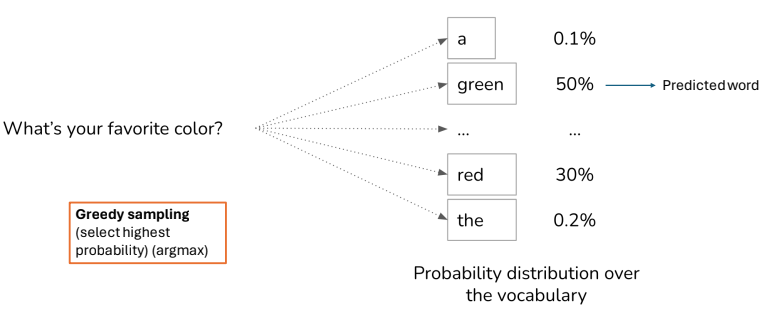

In [ ]:
model.eval()
temperature = 1.2
input_text = '<sos> chào em cô gái '
input_tokens = tokenizer(input_text)
input_ids = [vocab[token] for token in input_tokens]
eos_token_id = vocab['<eos>']
generated_ids = input_ids.copy()
MAX_GENERATION_LEN = 50
for _ in range(MAX_GENERATION_LEN):
    input_tensor = torch.tensor([generated_ids], dtype=torch.long).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)

    last_token_logits = outputs[0, -1, :]
    next_token_id = last_token_logits.argmax().item() ##################################
    generated_ids.append(next_token_id)

    if next_token_id == eos_token_id:
        break

# Convert the generated tokens back to text
generated_text = decode(generated_ids)
generated_text = ' '.join(generated_text)
generated_text = generated_text.replace('<sos>', '')
lines = generated_text.split('<eol>')
for line in lines:
    print(''.join(line))

 chào em cô gái mình? 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 
 Tôi 



Generate replicated words

(since we always choose highest probability)

### Random sampling

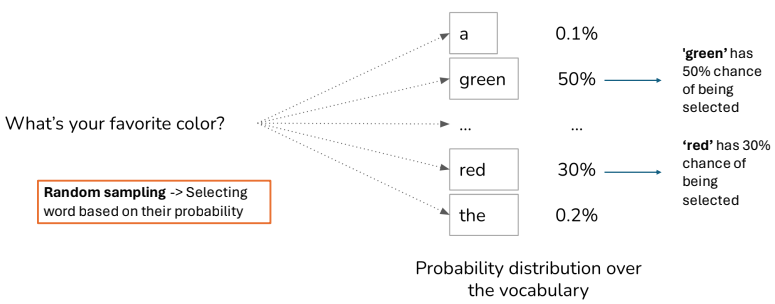

In [ ]:
def sampling(logits):
    probabilities = F.softmax(logits, dim=-1)

    sampled_index = torch.multinomial(probabilities, 1).item()

    return sampled_index

In [ ]:
model.eval()
temperature = 1.2
input_text = '<sos> chào em cô gái '
input_tokens = tokenizer(input_text)
input_ids = [vocab[token] for token in input_tokens]
eos_token_id = vocab['<eos>']
generated_ids = input_ids.copy()
MAX_GENERATION_LEN = 50
for _ in range(MAX_GENERATION_LEN):
    input_tensor = torch.tensor([generated_ids], dtype=torch.long).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)

    last_token_logits = outputs[0, -1, :]
    next_token_id = sampling(last_token_logits)
    generated_ids.append(next_token_id)

    if next_token_id == eos_token_id:
        break

# Convert the generated tokens back to text
generated_text = decode(generated_ids)
generated_text = ' '.join(generated_text)
generated_text = generated_text.replace('<sos>', '')
lines = generated_text.split('<eol>')
for line in lines:
    print(''.join(line))

 chào em cô gái mình? 
 lối mòn “quan ơi, hoàn mãi con không tán 
 Chỉ qua thương mênh mông 
 Theo bấy chân quét cây anh qua 
 Nở thơm mùi khoai khô 
 Năm xưa, kim một lòng trăm hoa đẹp niềm tin bắn sẻ, 
 Chiều cô thích 
 Ngàn


How to make the poem more diverse? => Introduce more randomness?

### Temperature

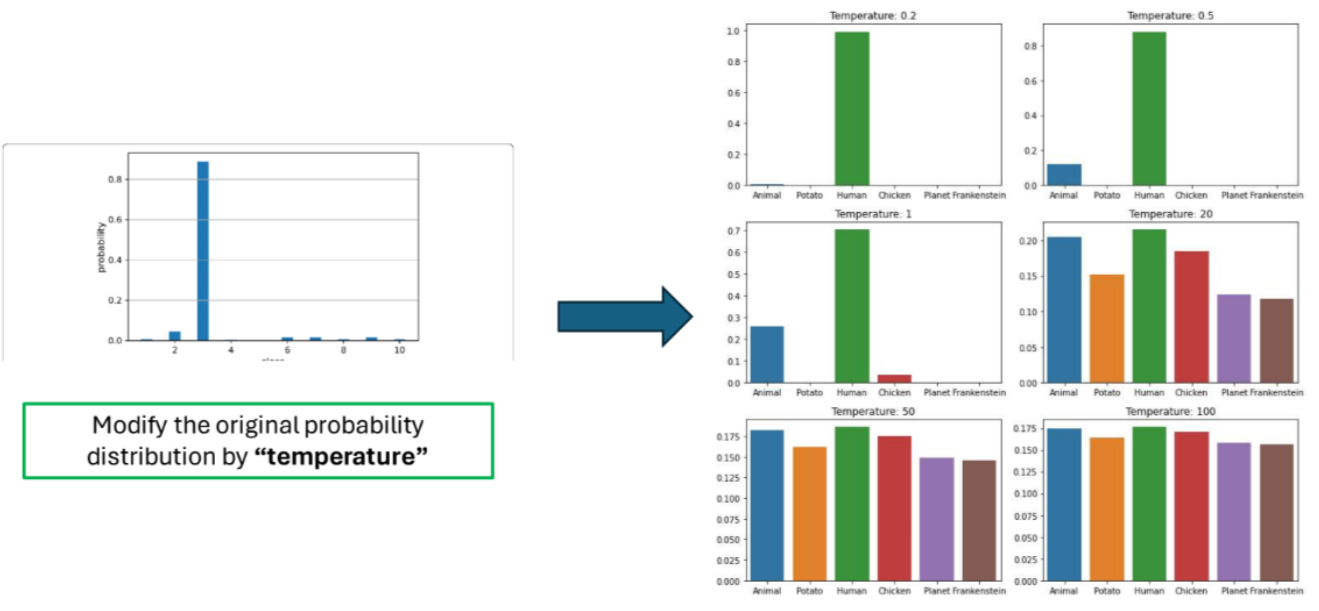

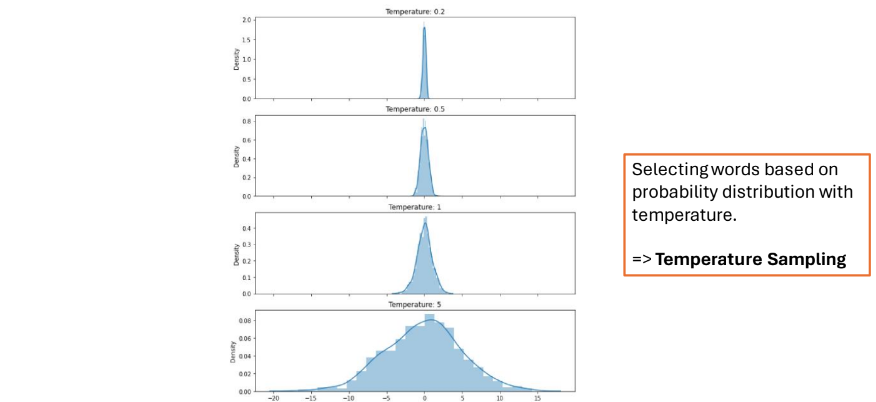

- temp < 1: co lại
- temp > 1: giãn ra
- temp = 1: không đổi

In [ ]:
def sample_with_temperature(logits, temperature=1.0):
    if temperature != 1.0:
        logits = logits / temperature

    probabilities = F.softmax(logits, dim=-1)

    sampled_index = torch.multinomial(probabilities, 1).item()

    return sampled_index

In [ ]:
model.eval()
temperature = 1.2
input_text = '<sos> chào em cô gái '
input_tokens = tokenizer(input_text)
input_ids = [vocab[token] for token in input_tokens]
eos_token_id = vocab['<eos>']
generated_ids = input_ids.copy()
MAX_GENERATION_LEN = 50
for _ in range(MAX_GENERATION_LEN):
    input_tensor = torch.tensor([generated_ids], dtype=torch.long).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)

    last_token_logits = outputs[0, -1, :]
    next_token_id = sample_with_temperature(last_token_logits, temperature)
    generated_ids.append(next_token_id)

    if next_token_id == eos_token_id:
        break

# Convert the generated tokens back to text
generated_text = decode(generated_ids)
generated_text = ' '.join(generated_text)
generated_text = generated_text.replace('<sos>', '')
lines = generated_text.split('<eol>')
for line in lines:
    print(''.join(line))

 chào em cô gái mình? xung 
 Nga? 
 Càng sao rơi mãi 
 Ba Nhan cõi nhân gian không mùi khoai lại đăng quả Hỡi quốc 
 Lời trời mây hè phắc em biết 
 Dịu đăm cầm khan 
 Người tiễn ta, quê xưa so cờ! ga ấy có rêu gối dừa
